# Importando bibliotecas

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Resumo do Dataset: column_2C_weka.csv

Este dataset contém atributos biomecânicos derivados da forma e orientação da pelve e da coluna lombar. O objetivo é classificar pacientes como "Normal" ou "Anormal".

## Descrição das Variáveis

| Variável                 | Descrição |
|--------------------------|-------------|
| pelvic_incidence         | Incidência Pélvica: Ângulo entre a linha perpendicular à placa sacral e a linha que conecta a placa sacral às cabeças femorais. |
| pelvic_tilt numeric      | Inclinação Pélvica: Ângulo entre a vertical e a linha que passa pelo ponto médio da placa sacral até as cabeças femorais. |
| lumbar_lordosis_angle    | Ângulo de Lordose Lombar: Ângulo de curvatura da coluna lombar. |
| sacral_slope             | Inclinação Sacral: Ângulo entre a horizontal e a placa sacral. |
| pelvic_radius            | Raio Pélvico: Distância do centro da placa sacral até as cabeças femorais. |
| degree_spondylolisthesis | Grau de Espondilolistese: Medida do deslocamento de uma vértebra em relação a outra. |
| class                    | Classe: Classificação do paciente, podendo ser "Normal" ou "Anormal". |


In [19]:
df = pd.read_csv('../datasets/column_2C_weka.csv')
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


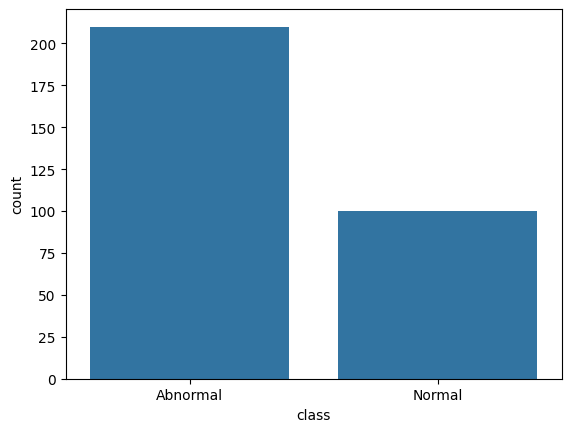

In [20]:
hist = df['class'].value_counts()

sns.barplot(hist)
plt.show()

In [26]:
df.isna().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [28]:
print(f'Número de duplicatas: {len(df[df.duplicated()])}')

Número de duplicatas: 0


# Pre processamento e ajuste de parâmetros

In [31]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()

x = df.drop('class', axis=1)
y = df['class']

y = y.map({'Normal': 0, 'Abnormal':1})

In [34]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

minimos_split = np.array([2,3,4,5,6,7,8])
maximo_nivel = np.array([3,4,5,6])
algoritmo = ['gini', 'entropy']
valores_grid = {'min_samples_split':minimos_split, 'max_depth':maximo_nivel, 'criterion':algoritmo}

modelo = DecisionTreeClassifier()

gridDecisionTree = GridSearchCV(estimator = modelo, param_grid=valores_grid, cv=5, scoring=None)
gridDecisionTree.fit(x,y)

print('Mínimo split: ', gridDecisionTree.best_estimator_.min_samples_split)
print('Máxima profundidade: ', gridDecisionTree.best_estimator_.max_depth)
print('Algoritmo escolhido: ', gridDecisionTree.best_estimator_.criterion)
print('Acuracia: ', gridDecisionTree.best_score_)

Mínimo split:  2
Máxima profundidade:  5
Algoritmo escolhido:  entropy
Acuracia:  0.7741935483870968


: 

# Treinamento do modelo

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

modelo = DecisionTreeClassifier(min_samples_split=7, 
                                max_depth=5, 
                                criterion='gini')
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

# Cálculo das métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Acurácia: {accuracy:.2f}')
print(f'Precisão: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

Acurácia: 0.76
Precisão: 0.87
Recall: 0.77
F1-Score: 0.82


# Exportação do modelo

In [25]:
import joblib

# Salvando o modelo
joblib.dump(modelo, '../outputs/models/Decision_tree_pelvic_classifier.pkl')

# Carregando o modelo
modelo_carregado = joblib.load('../outputs/models/Decision_tree_pelvic_classifier.pkl')

# Testando o modelo carregado
y_pred_carregado = modelo_carregado.predict(X_test)
print(f'Acurácia do modelo carregado: {accuracy_score(y_test, y_pred_carregado):.2f}')


Acurácia do modelo carregado: 0.76
